### 1. Relevant Libraries & Datasets

In [1]:
# Importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings for data exploration
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.float_format', '{:.2f}'.format)  # Format floats to 2 decimals

In [2]:
# Load the dataset

credit_data = pd.read_csv("credit_train.csv")
credit_data

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.00,Short Term,709.00,1167493.00,8 years,Home Mortgage,Home Improvements,5214.74,17.20,NaN,6.00,1.00,228190.00,416746.00,1.00,0.00
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.00,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.10,8.00,35.00,0.00,229976.00,850784.00,0.00,0.00
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.00,Short Term,741.00,2231892.00,8 years,Own Home,Debt Consolidation,29200.53,14.90,29.00,18.00,1.00,297996.00,750090.00,0.00,0.00
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.00,Long Term,721.00,806949.00,3 years,Own Home,Debt Consolidation,8741.90,12.00,NaN,9.00,0.00,256329.00,386958.00,0.00,0.00
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.00,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.10,NaN,15.00,0.00,253460.00,427174.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# General information about the dataset

print("\nDataset Information:")
credit_data.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last deli

### 2. Data Preparation & Cleaning
#### what do yall think about creating new features like monthly debt burden/ income vs loan amt ratio

In [4]:
# Selects the first 20,000 rows of the dataset and assigns them back to the credit_data variable

credit_data = credit_data.iloc[:20000]
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan ID                       20000 non-null  object 
 1   Customer ID                   20000 non-null  object 
 2   Loan Status                   20000 non-null  object 
 3   Current Loan Amount           20000 non-null  float64
 4   Term                          20000 non-null  object 
 5   Credit Score                  16140 non-null  float64
 6   Annual Income                 16140 non-null  float64
 7   Years in current job          19136 non-null  object 
 8   Home Ownership                20000 non-null  object 
 9   Purpose                       20000 non-null  object 
 10  Monthly Debt                  20000 non-null  float64
 11  Years of Credit History       20000 non-null  float64
 12  Months since last delinquent  9272 non-null   float64
 13  N

In [5]:
# Checking for missing/null values 
# (actually thought we got this insight from the above cell already)
credit_data.isna().sum()

Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                     3860
Annual Income                    3860
Years in current job              864
Home Ownership                      0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    10728
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 0
Bankruptcies                       44
Tax Liens                           3
dtype: int64

In [6]:
# Rationale: Already have 20,000 rows so removing the missing/null values will not significantly affect dataset. 
# However, we drop the "Months since last delinquet" column entirely because >50% is missing/null.

# Ensure you're working on a proper copy to avoid SettingWithCopyWarning
credit_data = credit_data.iloc[:20000].copy()

# Drop rows with missing values in key numeric columns
credit_data = credit_data.dropna(subset=['Credit Score', 'Annual Income', 'Years in current job', 'Bankruptcies', 'Tax Liens'])

# Drop column with >50% missing values
credit_data = credit_data.drop(columns=['Months since last delinquent'])

# Also drop Loan ID and Customer ID which are irrelevant to analysis 
credit_data = credit_data.drop(columns=["Loan ID", "Customer ID"])


In [7]:
# double check no more missing/null
credit_data.isna().sum()

Loan Status                  0
Current Loan Amount          0
Term                         0
Credit Score                 0
Annual Income                0
Years in current job         0
Home Ownership               0
Purpose                      0
Monthly Debt                 0
Years of Credit History      0
Number of Open Accounts      0
Number of Credit Problems    0
Current Credit Balance       0
Maximum Open Credit          0
Bankruptcies                 0
Tax Liens                    0
dtype: int64

In [8]:
# Count the number of duplicate rows in the dataset
print("Number of duplicate rows in the dataset:")
credit_data.duplicated().sum()

Number of duplicate rows in the dataset:


390

In [9]:
# Drop duplicate rows
credit_data = credit_data.drop_duplicates()
print("Number of duplicate rows after dropping:")
print(credit_data.duplicated().sum())

Number of duplicate rows after dropping:
0


### 3. Exploring dataset which we roughly cleaned to identify further issues

In [10]:
# Check for categorical and numerical columns

categorical_columns = credit_data.select_dtypes(include=['object']).columns.tolist()
numerical_columns = credit_data.select_dtypes(include=['float64', 'int64']).columns.tolist()
print("\nCategorical Columns:", categorical_columns)
print("Numerical Columns:", numerical_columns)


Categorical Columns: ['Loan Status', 'Term', 'Years in current job', 'Home Ownership', 'Purpose']
Numerical Columns: ['Current Loan Amount', 'Credit Score', 'Annual Income', 'Monthly Debt', 'Years of Credit History', 'Number of Open Accounts', 'Number of Credit Problems', 'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies', 'Tax Liens']


In [11]:
print("Numerical Summary:")
print(credit_data.describe())

print("\nCategorical Summary:")
print(credit_data.describe(include='object'))


Numerical Summary:
       Current Loan Amount  Credit Score  Annual Income  Monthly Debt  \
count             15013.00      15013.00       15013.00      15013.00   
mean           14672334.38       1096.86     1394890.80      18637.54   
std            35000080.94       1512.48      913227.56      12191.19   
min               15422.00        586.00      111245.00          0.00   
25%              193358.00        706.00      859883.00      10352.34   
50%              327250.00        725.00     1197950.00      16302.19   
75%              552860.00        741.00     1671506.00      24269.84   
max            99999999.00       7510.00    30838995.00     205801.35   

       Years of Credit History  Number of Open Accounts  \
count                 15013.00                 15013.00   
mean                     17.96                    11.18   
std                       6.68                     5.00   
min                       3.70                     1.00   
25%                      13.

In [12]:
# Calculate the number of unique values in each column of the dataset

print(f"Number of unique values:")
credit_data.nunique()

Number of unique values:


Loan Status                      2
Current Loan Amount           8993
Term                             2
Credit Score                   293
Annual Income                12237
Years in current job            11
Home Ownership                   4
Purpose                         16
Monthly Debt                 14302
Years of Credit History        419
Number of Open Accounts         45
Number of Credit Problems        8
Current Credit Balance       11732
Maximum Open Credit          12895
Bankruptcies                     6
Tax Liens                        7
dtype: int64

In [13]:
# Iterate through all columns starting from the 3rd column (index 2) in the dataset
for col in credit_data.columns[2:]:
    # Check if the column has fewer than 16 unique values (categorical or low-cardinality data)
    if credit_data[col].nunique() <= 16:
        # Print the column name and its unique values for inspection
        print(col + ": " + str(credit_data[col].unique()))
        print("-------------------------------------------------------------")

Term: ['Short Term' 'Long Term']
-------------------------------------------------------------
Years in current job: ['8 years' '3 years' '10+ years' '< 1 year' '2 years' '4 years' '1 year'
 '6 years' '5 years' '7 years' '9 years']
-------------------------------------------------------------
Home Ownership: ['Home Mortgage' 'Own Home' 'Rent' 'HaveMortgage']
-------------------------------------------------------------
Purpose: ['Home Improvements' 'Debt Consolidation' 'Buy House' 'Business Loan'
 'other' 'major_purchase' 'Take a Trip' 'Other' 'Buy a Car'
 'small_business' 'Medical Bills' 'wedding' 'vacation'
 'Educational Expenses' 'moving' 'renewable_energy']
-------------------------------------------------------------
Number of Credit Problems: [1. 0. 5. 2. 4. 3. 7. 6.]
-------------------------------------------------------------
Bankruptcies: [1. 0. 2. 3. 4. 5.]
-------------------------------------------------------------
Tax Liens: [0. 1. 4. 2. 3. 6. 5.]
-----------------------

In [14]:
# Iterate through all columns in the dataset starting from the 3rd column (index 2)
for col in credit_data.columns[2:]:
    # Print the value counts for the current column
    print(str(credit_data[col].value_counts()))
    print("-------------------------------------------------------------")

Term
Short Term    10566
Long Term      4447
Name: count, dtype: int64
-------------------------------------------------------------
Credit Score
747.00     360
740.00     332
739.00     329
741.00     326
721.00     320
          ... 
6560.00      1
6310.00      1
5960.00      1
589.00       1
5850.00      1
Name: count, Length: 293, dtype: int64
-------------------------------------------------------------
Annual Income
1330532.00    7
1146612.00    6
1168272.00    6
1138518.00    6
1328803.00    6
             ..
3470369.00    1
1932775.00    1
521208.00     1
1930951.00    1
1058262.00    1
Name: count, Length: 12237, dtype: int64
-------------------------------------------------------------
Years in current job
10+ years    4917
2 years      1394
< 1 year     1289
3 years      1210
5 years      1082
1 year        990
4 years       971
6 years       930
7 years       876
8 years       701
9 years       653
Name: count, dtype: int64
--------------------------------------------------

No. of IQR outliers in 'Current Loan Amount': 2162
Percentage of outliers: 14.40%
-----------------------------------------------------------------
No. of IQR outliers in 'Credit Score': 1430
Percentage of outliers: 9.53%
-----------------------------------------------------------------
No. of IQR outliers in 'Annual Income': 682
Percentage of outliers: 4.54%
-----------------------------------------------------------------
No. of IQR outliers in 'Monthly Debt': 511
Percentage of outliers: 3.40%
-----------------------------------------------------------------
No. of IQR outliers in 'Years of Credit History': 443
Percentage of outliers: 2.95%
-----------------------------------------------------------------
No. of IQR outliers in 'Number of Open Accounts': 365
Percentage of outliers: 2.43%
-----------------------------------------------------------------
No. of IQR outliers in 'Number of Credit Problems': 2124
Percentage of outliers: 14.15%
---------------------------------------------

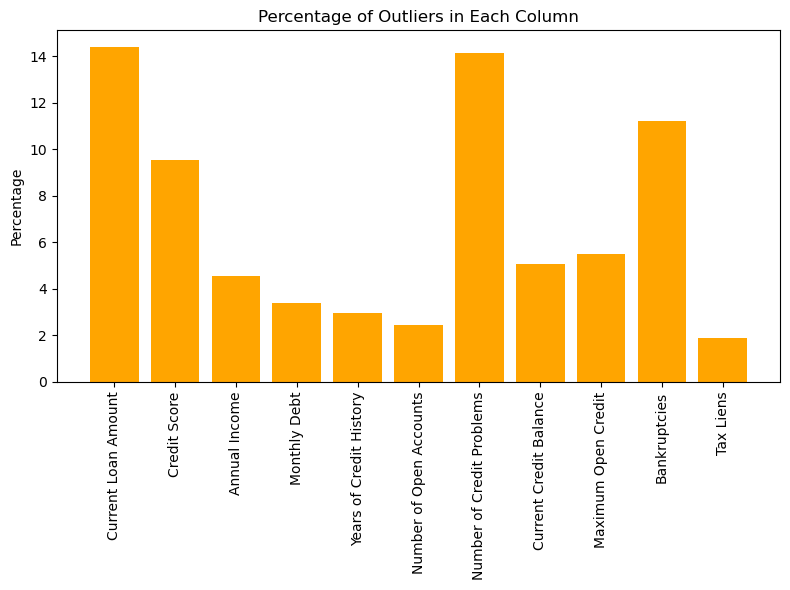

In [15]:
# Count outliers for each variable

# Initialize empty lists to store numerical and categorical column names
num_columns = []
cat_columns = []

for col in credit_data.columns:
    if credit_data[col].dtype == "float64":
        num_columns.append(col)
    else:
        cat_columns.append(col)
        
def analyze_visualize_outliers(data, num_columns, plot_type="both"):

    # Dictionary to store outlier information for each column
    outlier_data = {}
    for col in num_columns:
        data_column = data[col]

        # Calculate Q1, Q3, IQR and bounds for outliers 
        Q1 = data_column.quantile(0.25)
        Q3 = data_column.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers based on the bounds
        outliers = data_column[(data_column < lower_bound) | (data_column > upper_bound)]
        outlier_counts = len(outliers)  # Count of outliers
        outlier_percentages = (outlier_counts / len(data_column)) * 100  # Percentage of outliers

        # Store the outlier data for the current column
        outlier_data[col] = {
            'count': outlier_counts,
            'percentage': outlier_percentages,
            'outliers': outliers.tolist()
        }

        # Print outliers 
        print(f"No. of IQR outliers in '{col}': {outlier_counts}")
        print(f"Percentage of outliers: {outlier_percentages:.2f}%")
        print("-----------------------------------------------------------------")

    # Visualization of outliers based on the specified plot type
    if plot_type == "counts":
        # Plot the number of outliers for each column
        fig, ax = plt.subplots(figsize=(8, 6))
        ax.bar(outlier_data.keys(), [v['count'] for v in outlier_data.values()], color='red')
        ax.set_title('Number of Outliers in Each Column')
        ax.set_ylabel('Count')
        ax.set_xticks(list(outlier_data.keys()))  # Set x-axis ticks
        ax.set_xticklabels(list(outlier_data.keys()), rotation=90)  # Rotate labels for readability
        plt.tight_layout()
        plt.show()

    elif plot_type == "percentages":
        # Plot the percentage of outliers for each column
        fig, ax = plt.subplots(figsize=(8, 6))
        ax.bar(outlier_data.keys(), [v['percentage'] for v in outlier_data.values()], color='orange')
        ax.set_title('Percentage of Outliers in Each Column')
        ax.set_ylabel('Percentage')
        ax.set_xticks(list(outlier_data.keys()))  # Set x-axis ticks
        ax.set_xticklabels(list(outlier_data.keys()), rotation=90)  # Rotate labels for readability
        plt.tight_layout()
        plt.show()

    elif plot_type == "both":
        # Plot both the count and percentage of outliers side by side
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

        # Plot outlier counts
        ax1.bar(outlier_data.keys(), [v['count'] for v in outlier_data.values()], color='red')
        ax1.set_title('Number of Outliers in Each Column')
        ax1.set_ylabel('Count')
        ax1.set_xticks(list(outlier_data.keys()))  # Set x-axis ticks
        ax1.set_xticklabels(list(outlier_data.keys()), rotation=90)  # Rotate labels for readability

        # Plot outlier percentages
        ax2.bar(outlier_data.keys(), [v['percentage'] for v in outlier_data.values()], color='orange')
        ax2.set_title('Percentage of Outliers in Each Column')
        ax2.set_ylabel('Percentage')
        ax2.set_xticks(list(outlier_data.keys()))  # Set x-axis ticks
        ax2.set_xticklabels(list(outlier_data.keys()), rotation=90)  # Rotate labels for readability

        plt.tight_layout()
        plt.show()

    else:
        # Handle invalid plot type
        print(f"Invalid plot_type: {plot_type}. Valid options are 'counts', 'percentages', or 'both'.")

    # Return the dictionary containing outlier information for further use
    return outlier_data

# Call the function to analyze and visualize outliers in numerical columns of the dataset
# Specify 'percentages' as the plot type to visualize the percentage of outliers in each column
outlier_results = analyze_visualize_outliers(credit_data, num_columns, plot_type="percentages")

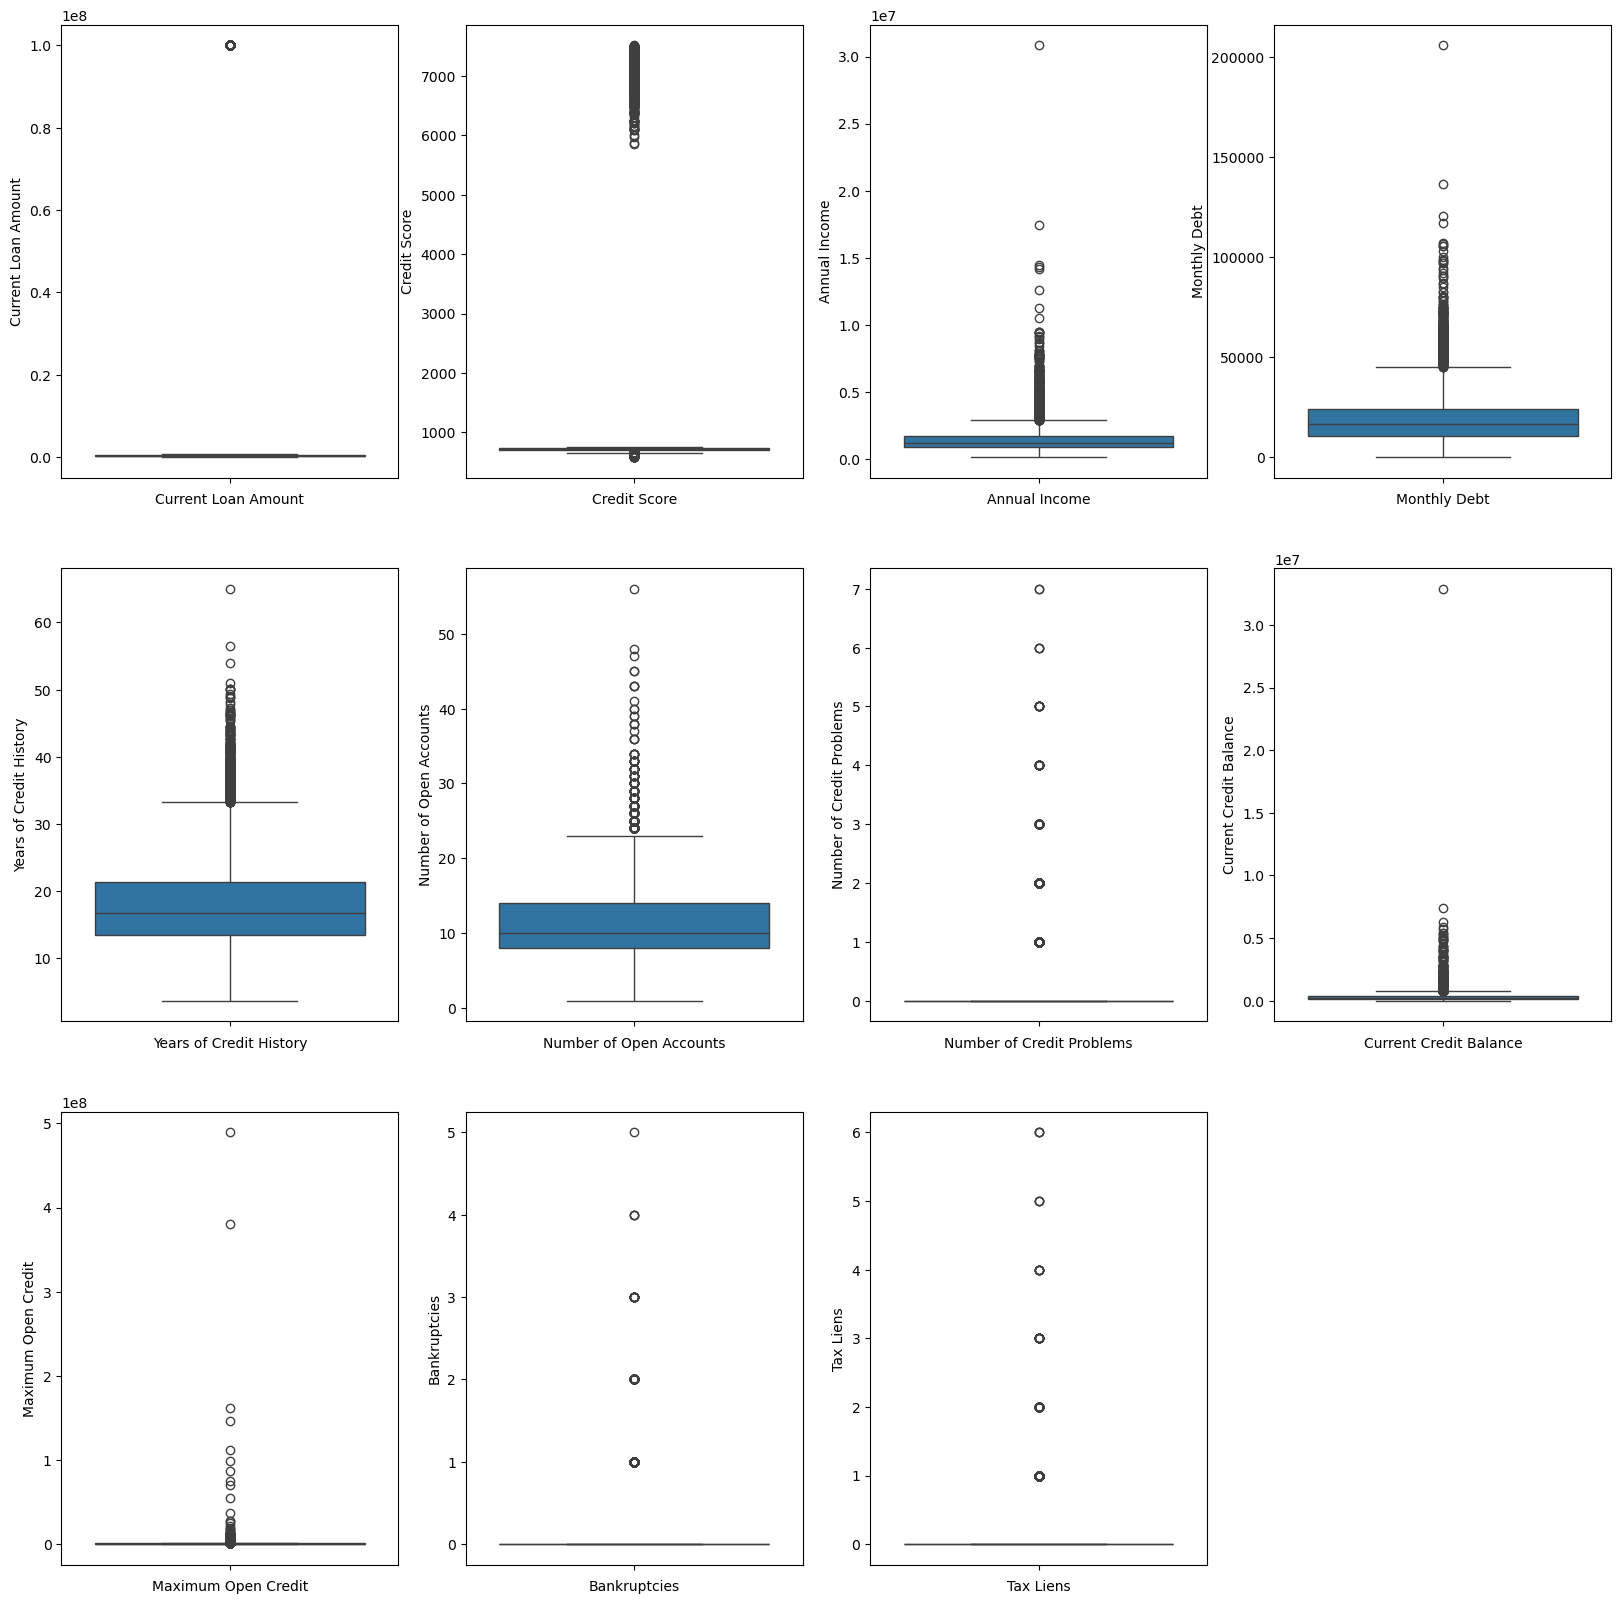

In [16]:
# Boxplot to visualise outliers

fig = plt.figure(figsize=(20,20))

counter = 0

for col in num_columns:
    sub = fig.add_subplot(3,4,counter+1)
    g = sns.boxplot(y=col, data=credit_data)
    plt.xlabel(col)
    counter = counter + 1


In [17]:
# Inspect Current Loan Amount outliers (suspicious)

Q1 = credit_data['Current Loan Amount'].quantile(0.25)
Q3 = credit_data['Current Loan Amount'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

outliers = credit_data[credit_data['Current Loan Amount'] > upper_bound]
print(outliers[['Current Loan Amount']])

       Current Loan Amount
2              99999999.00
10             99999999.00
12             99999999.00
13             99999999.00
26             99999999.00
...                    ...
19961          99999999.00
19963          99999999.00
19971          99999999.00
19973          99999999.00
19994          99999999.00

[2162 rows x 1 columns]


### 4. Data Preparation & Cleaning 

In [18]:
# Standardising the Purpose column 
purpose_mapping = {  
    'Home Improvements': 'Big Purchase',
    'Buy House': 'Big Purchase',
    'moving': 'Big Purchase',
    'Buy a Car': 'Big Purchase',
    'major_purchase': 'Big Purchase',
    'wedding': 'Big Purchase',

    'Debt Consolidation': 'Debt Consolidation',

    'Business Loan': 'Business Loan',
    'small_business': 'Business Loan',

    'Buy a Car': 'Essential Needs',
    'Medical Bills': 'Essential Needs',
    'Educational Expenses': 'Essential Needs',

    'vacation': 'Leisure',
    'Take a Trip': 'Leisure',

    'other': 'Other',
    'Other': 'Other',
    'renewable_energy' : 'Other'
}

credit_data['Purpose'] = credit_data['Purpose'].replace(purpose_mapping)

In [19]:
# Standardizing Home Ownership column
credit_data["Home Ownership"] = credit_data["Home Ownership"].replace({"HaveMortgage":"Home Mortgage"})

In [20]:
# Standardise years in current job column
credit_data["Years in current job"] = credit_data["Years in current job"].replace({"7 years":"7-9 years",
                                                                                 "8 years":"7-9 years",
                                                                                 "9 years":"7-9 years",
                                                                                 "4 years":"4-6 years",
                                                                                 "5 years":"4-6 years",
                                                                                 "6 years":"4-6 years",
                                                                                 "< 1 year":"0-1 year",
                                                                                 "1 year":"0-1 year",
                                                                                 "2 years":"2-3 years",
                                                                                 "3 years":"2-3 years"})

In [21]:
# Check Cleaned Data 
print('Purpose: ')
print(credit_data["Purpose"].unique())
print('Home Ownership: ')
print(credit_data["Home Ownership"].unique())
print('Years in current job: ')
print(credit_data["Years in current job"].unique())

Purpose: 
['Big Purchase' 'Debt Consolidation' 'Business Loan' 'Other' 'Leisure'
 'Essential Needs']
Home Ownership: 
['Home Mortgage' 'Own Home' 'Rent']
Years in current job: 
['7-9 years' '2-3 years' '10+ years' '0-1 year' '4-6 years']


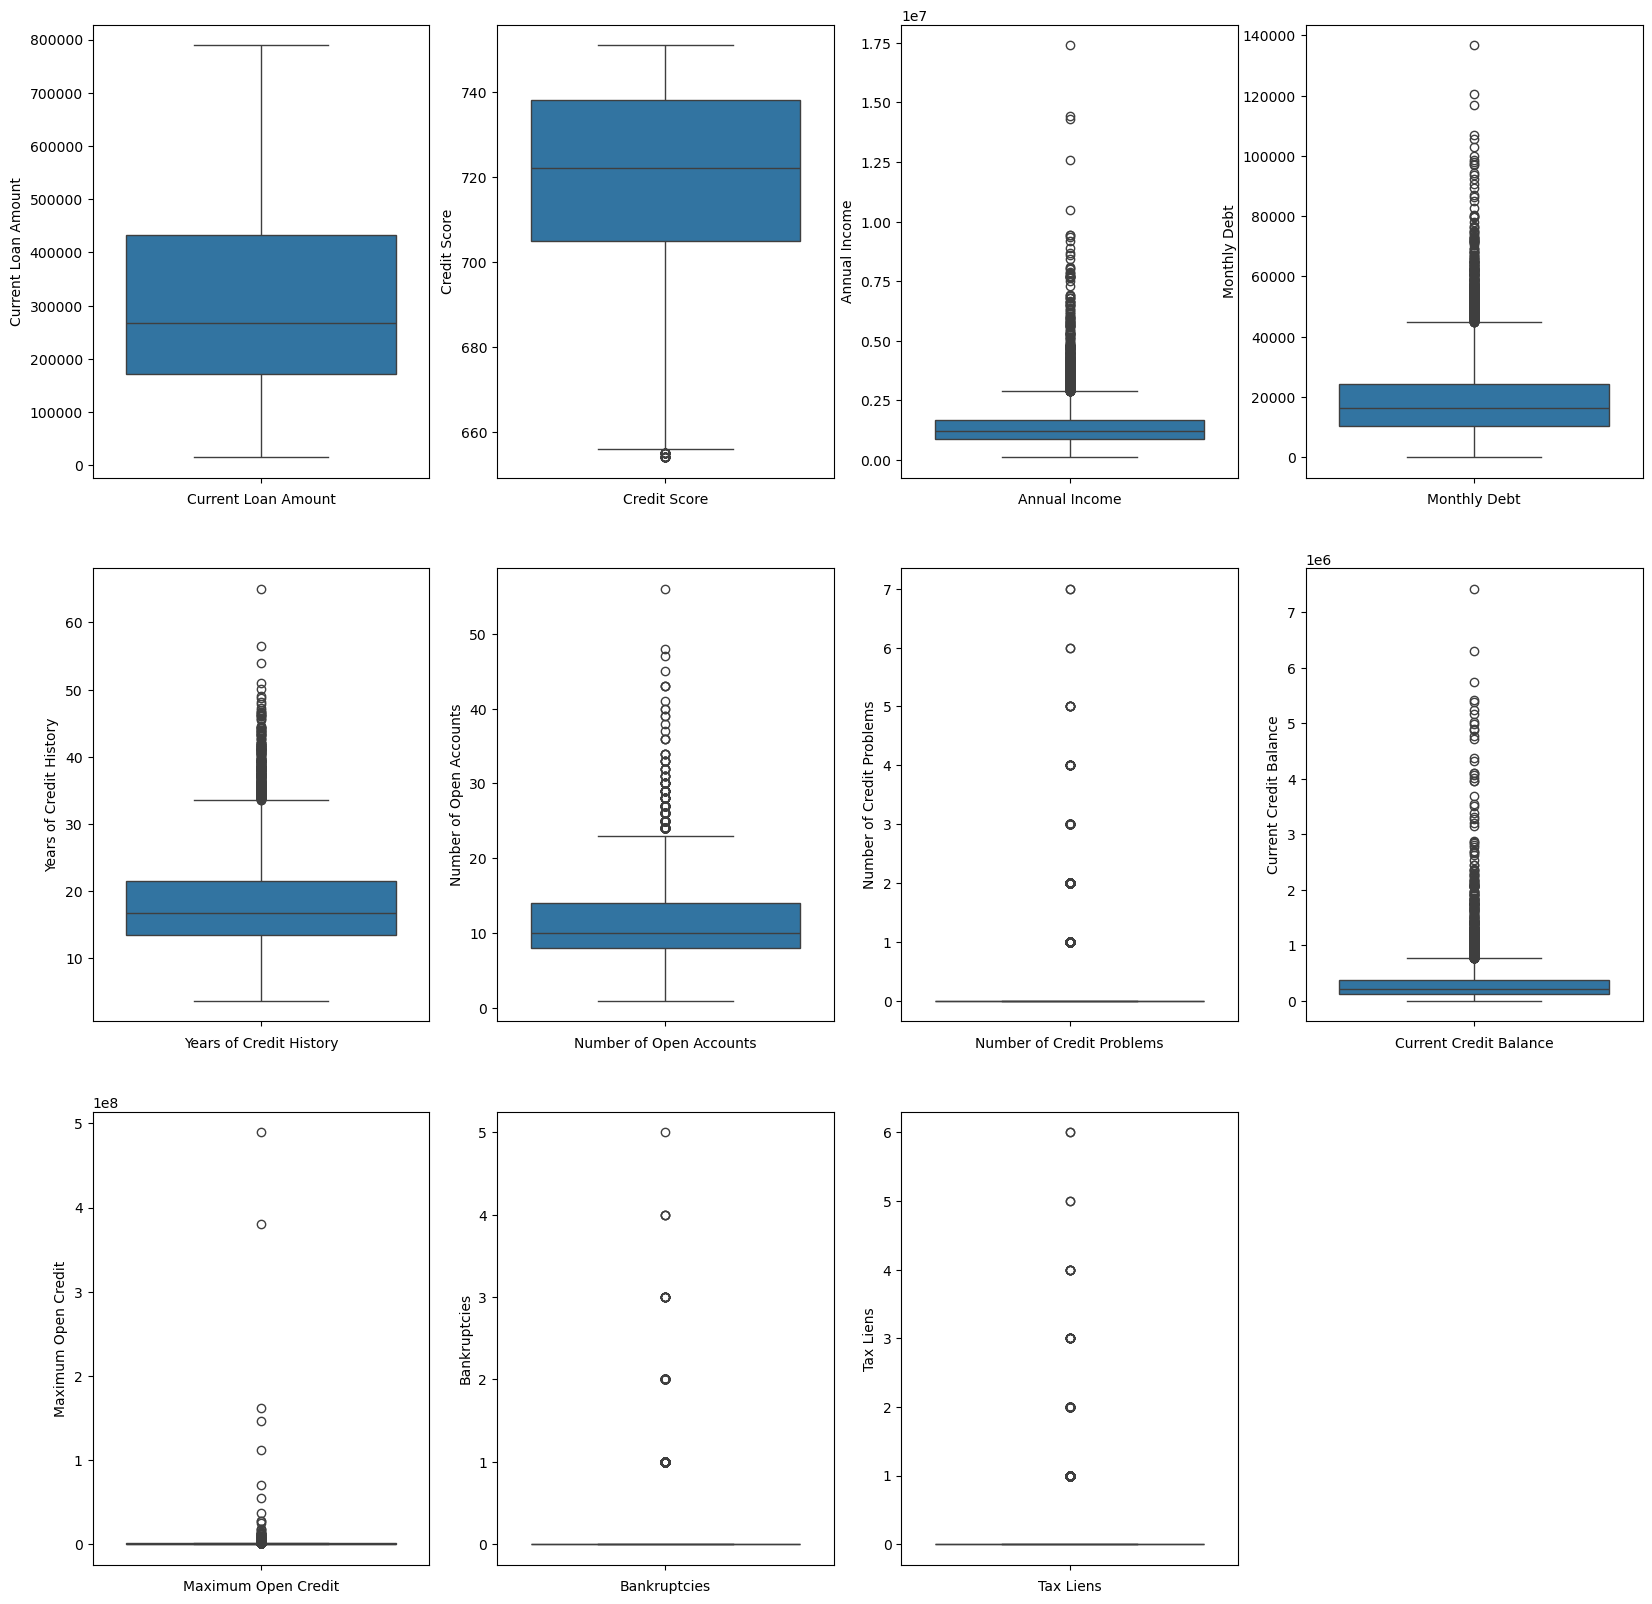

In [22]:
# Remove outliers from Credit Score and Current Loan Amount

Q1_s = credit_data['Credit Score'].quantile(0.25)
Q3_s = credit_data['Credit Score'].quantile(0.75)
IQR_s = Q3_s - Q1_s
lower_bound_s = Q1_s - 1.5 * IQR_s
upper_bound_s = Q3_s + 1.5 * IQR_s

Q1_l = credit_data['Current Loan Amount'].quantile(0.25)
Q3_l = credit_data['Current Loan Amount'].quantile(0.75)
IQR_l = Q3_l - Q1_l
lower_bound_l = Q1_l - 1.5 * IQR_l
upper_bound_l = Q3_l + 1.5 * IQR_l

# Filter out outliers
data = credit_data[(credit_data['Credit Score'] >= lower_bound_s) & (credit_data['Credit Score'] <= upper_bound_s)
                        & (credit_data['Current Loan Amount'] >= lower_bound_l) & (credit_data['Current Loan Amount'] <= upper_bound_l)]

# Boxplots to visualise outliers 
fig = plt.figure(figsize=(20,20))

counter = 0

for col in num_columns:
    sub = fig.add_subplot(3,4,counter+1)
    g = sns.boxplot(y=col, data=data)
    plt.xlabel(col)
    counter = counter + 1

### Observation: 
- With outliers removed, data looks a lot more acceptable!

### 5. Data Visualisation & EDA

Text(0, 0.5, '')

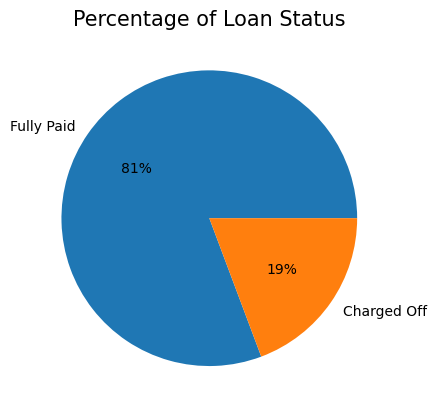

In [23]:
# Visualising Loan Status (response variable)

data['Loan Status'].value_counts().plot(kind='pie', autopct='%0.0f%%')
plt.title('Percentage of Loan Status', fontsize=15)
plt.ylabel('')

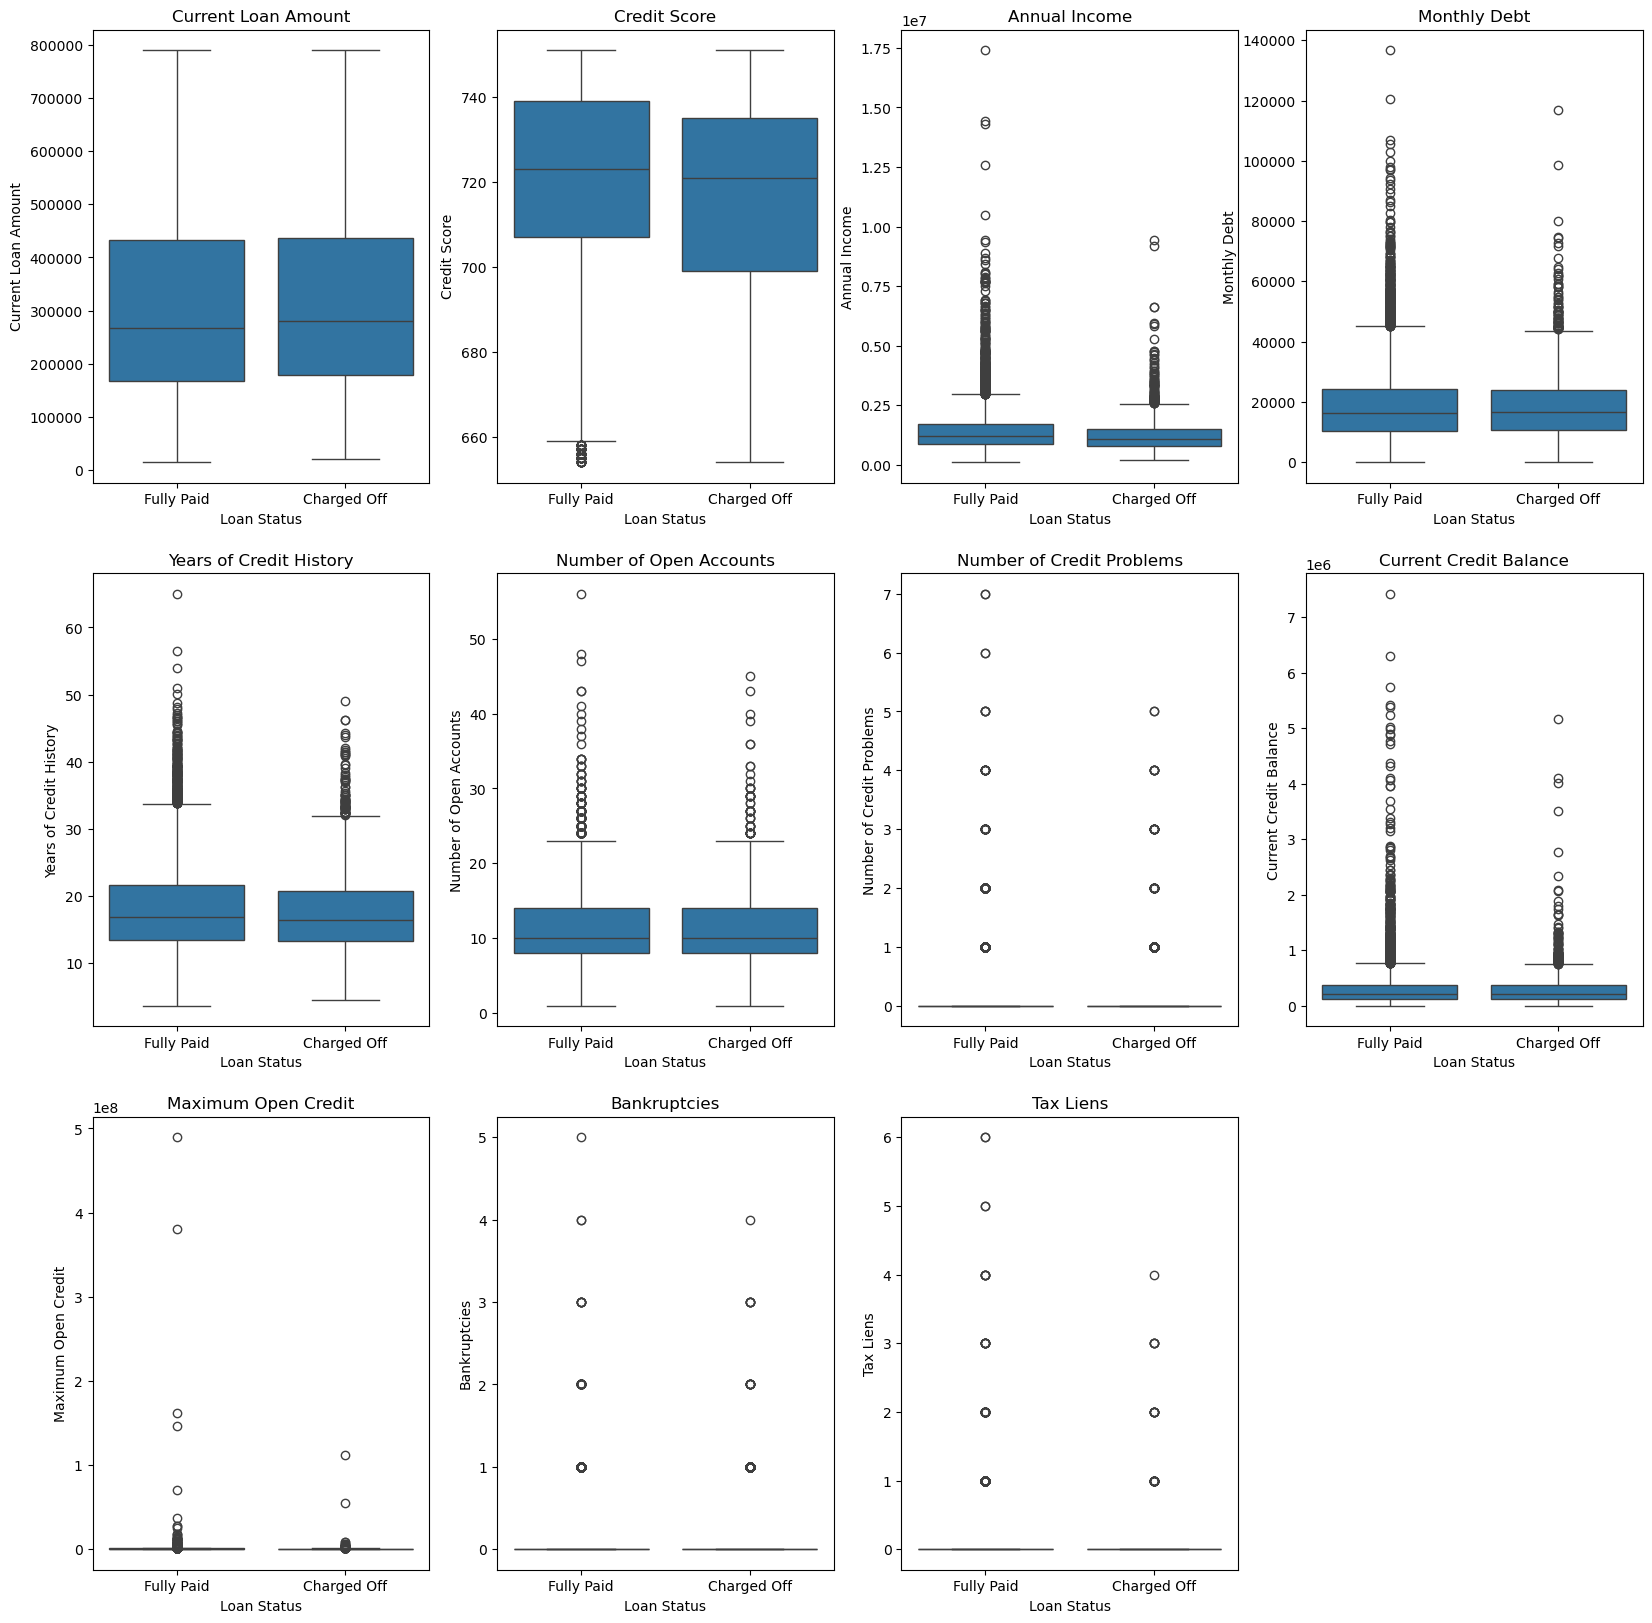

In [24]:
# Correlations between numerical variables and Loan Status
fig = plt.figure(figsize=(20,20))

counter = 0

for col in num_columns:
    sub = fig.add_subplot(3,4,counter+1)
    g = sns.boxplot(x="Loan Status", y=col, data=data)
    plt.title(f'{col}')
    plt.xlabel('Loan Status')
    plt.ylabel(col)
    counter = counter + 1

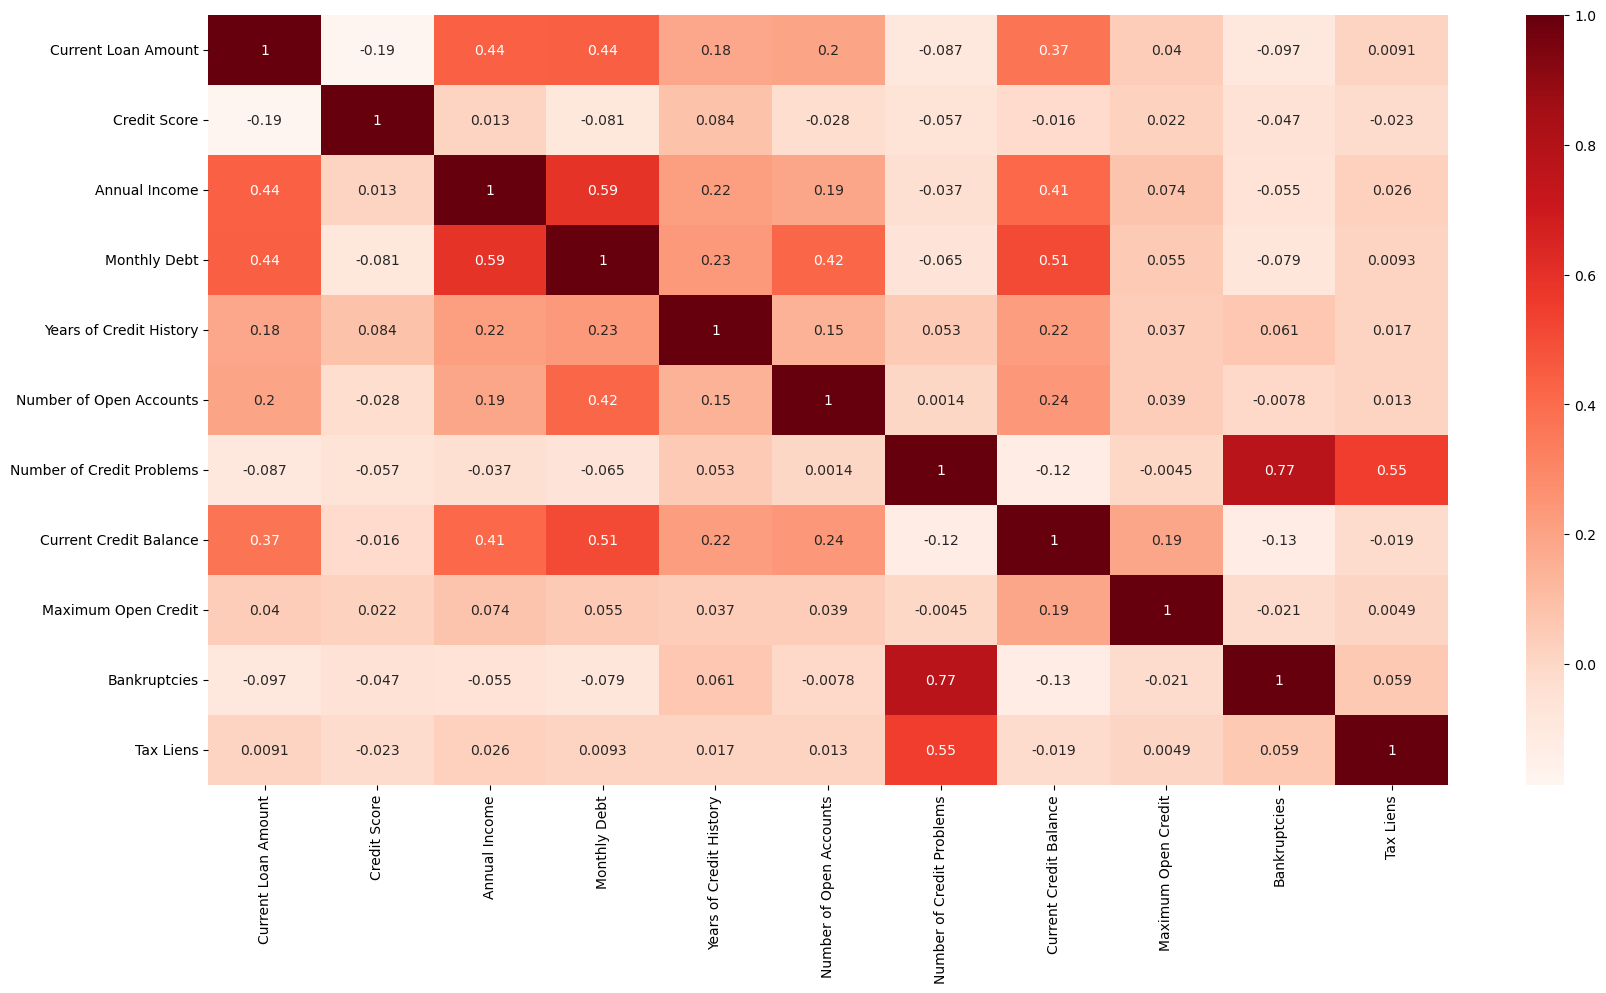

In [25]:
# Correlations among numerical variables 
plt.figure(figsize = (20,10))

sns.heatmap(data[num_columns].corr(), cmap = 'Reds', annot = True)
plt.show()

### Observations: 
Strong Correlations 
- Number of Credit Problems with Bankruptcies (0.77)
- Annual Income with Monthly Debt (0.6)
- Number of Credit Problems with Tax Liens (0.57)

Moderate Correlations 
- Current Credit Balance with Monthly Debt (0.47)
- Current Loan Amount with Monthly Debt (0.46)
- Current Loan Amount with Annual Income (0.46)

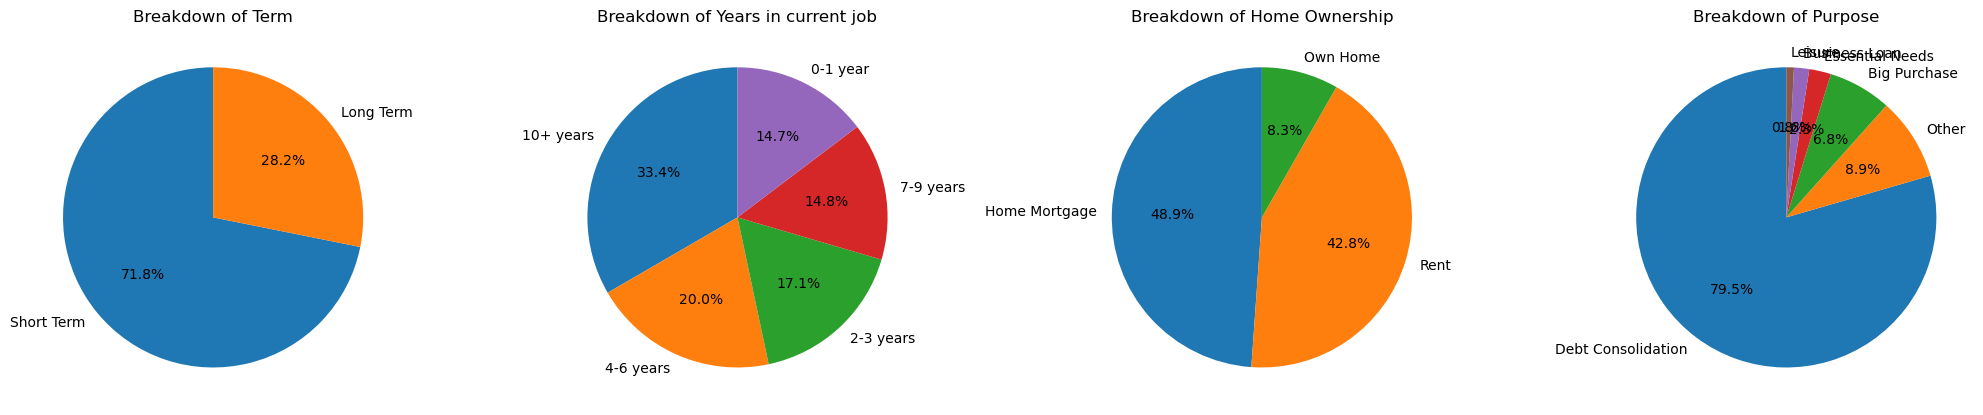

In [26]:
# Visualising categorical predictors 

def plot_overall_pie_charts(df, columns):
    n = len(columns)
    fig, axes = plt.subplots(1, n, figsize=(5 * n, 5))

    if n == 1:
        axes = [axes]  # handle single-column case

    for i, column in enumerate(columns):
        data = df[column].dropna().str.strip()
        counts = data.value_counts(normalize=True) * 100
        axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
        axes[i].set_title(f'Breakdown of {column}')

    plt.tight_layout()
    plt.show()

columns_to_plot = ['Term', 'Years in current job', 'Home Ownership', 'Purpose']
plot_overall_pie_charts(data, columns_to_plot)

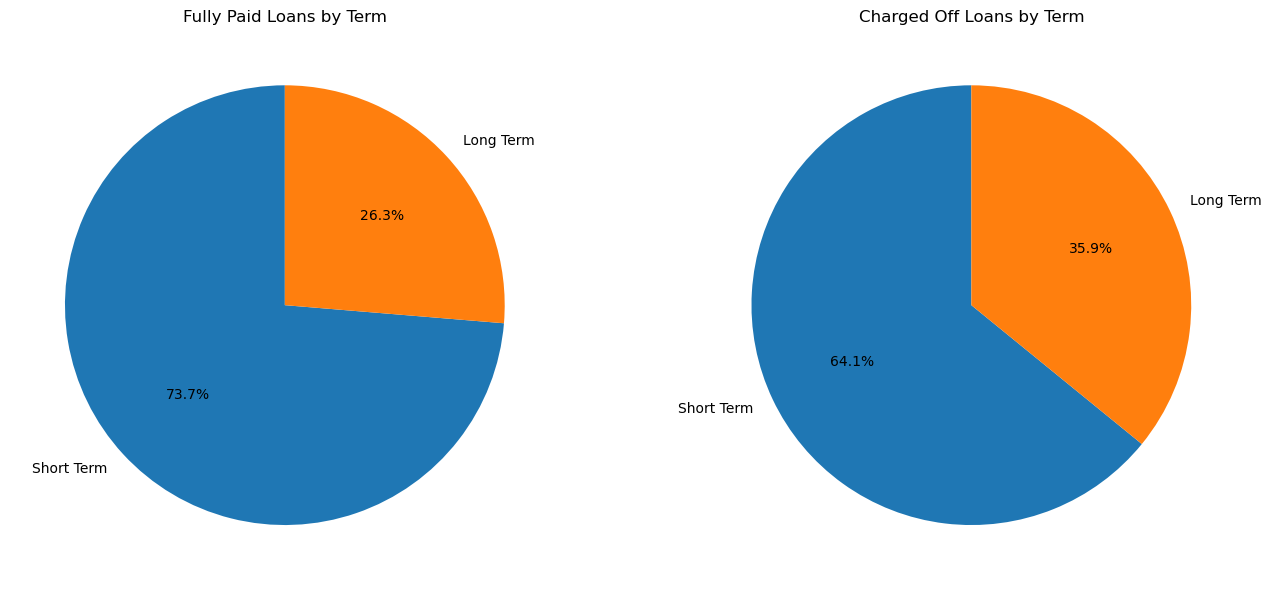

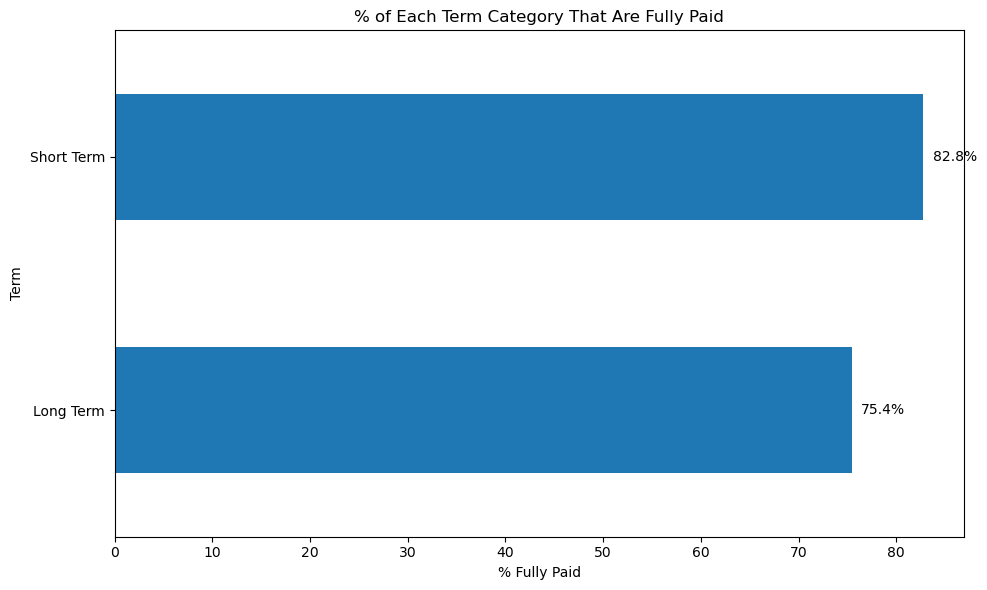

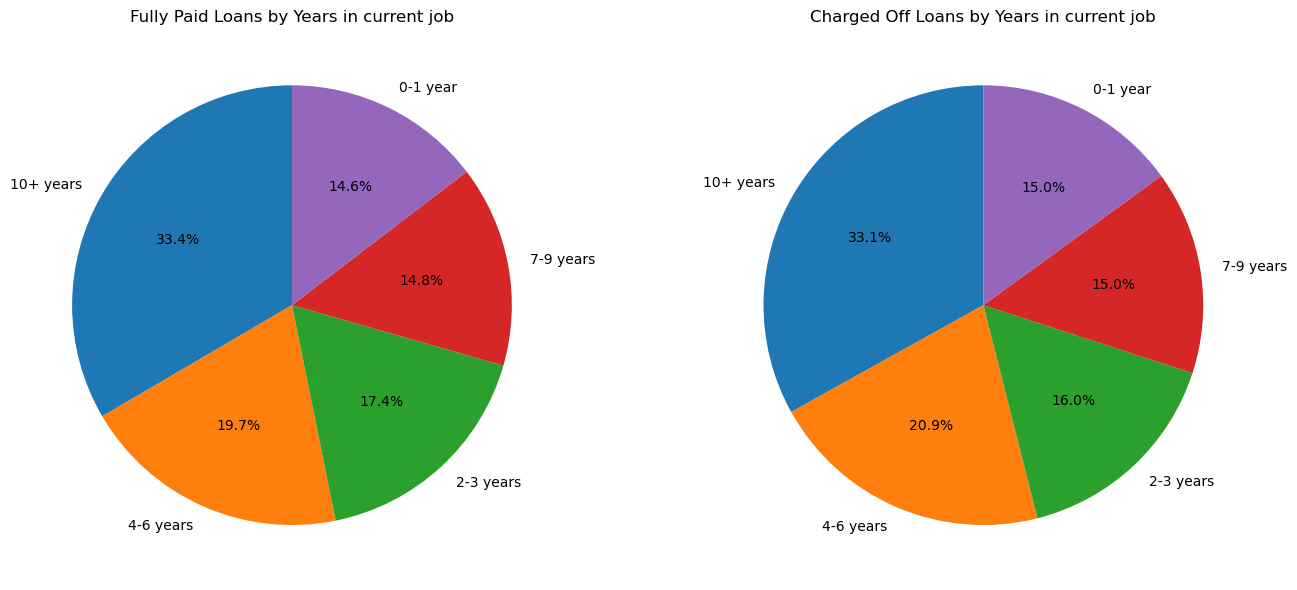

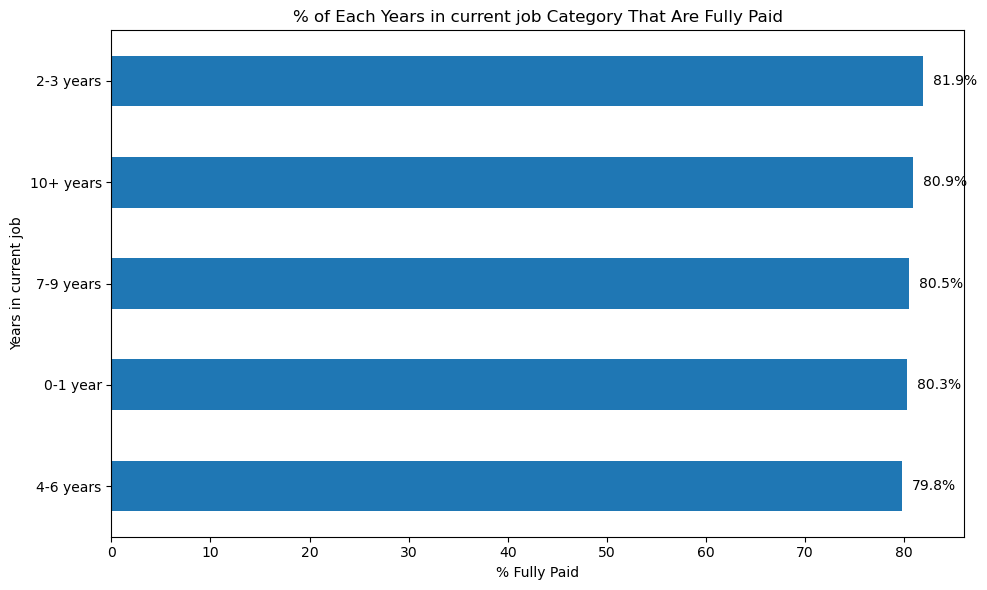

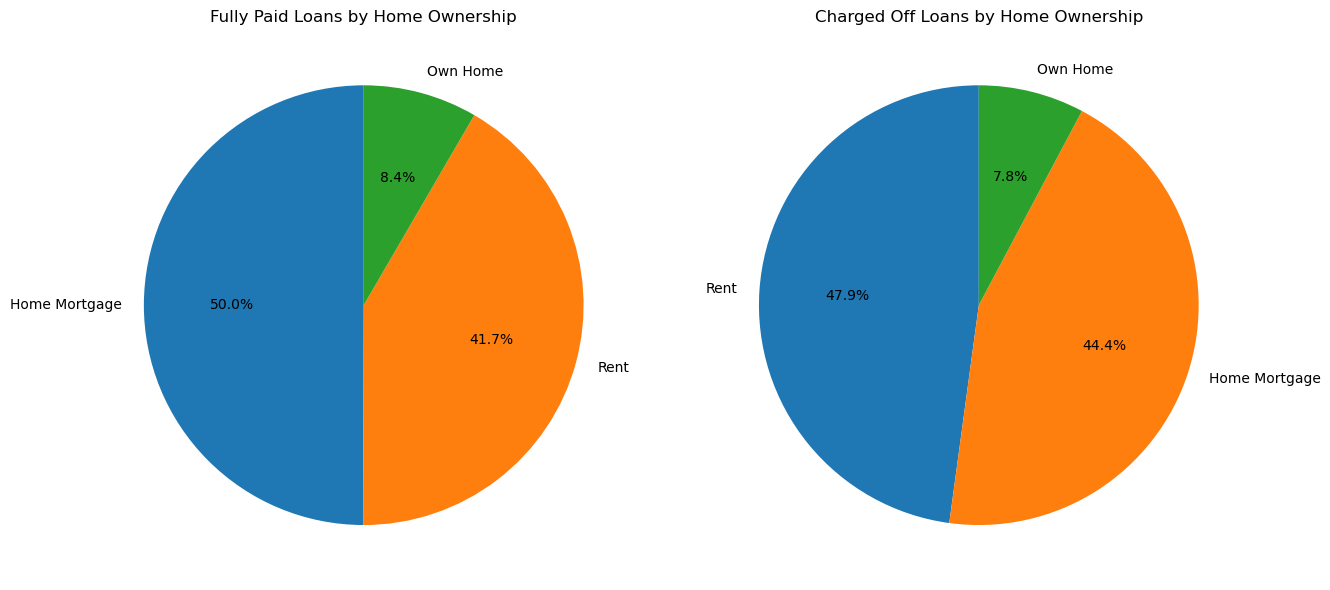

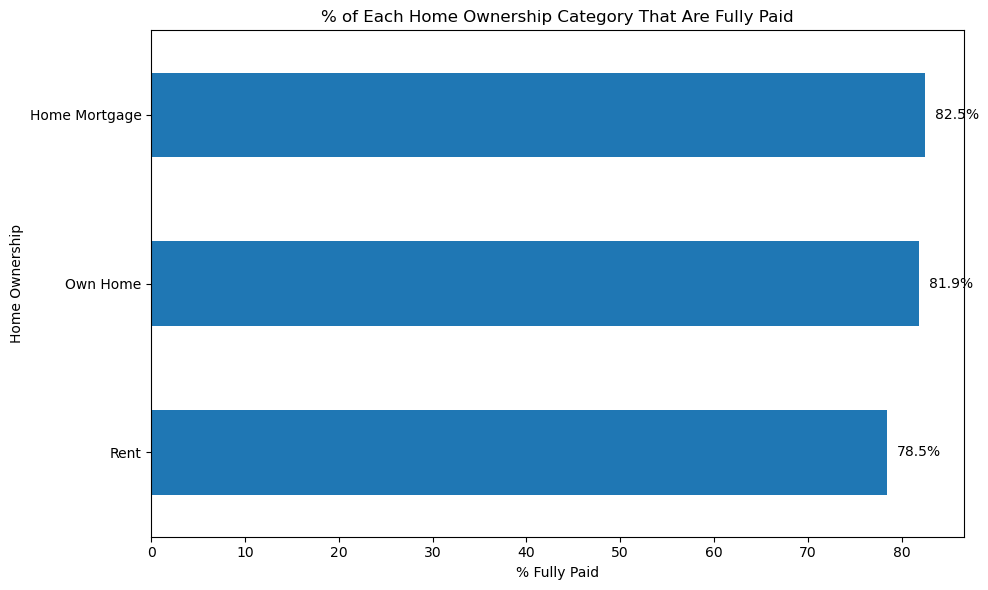

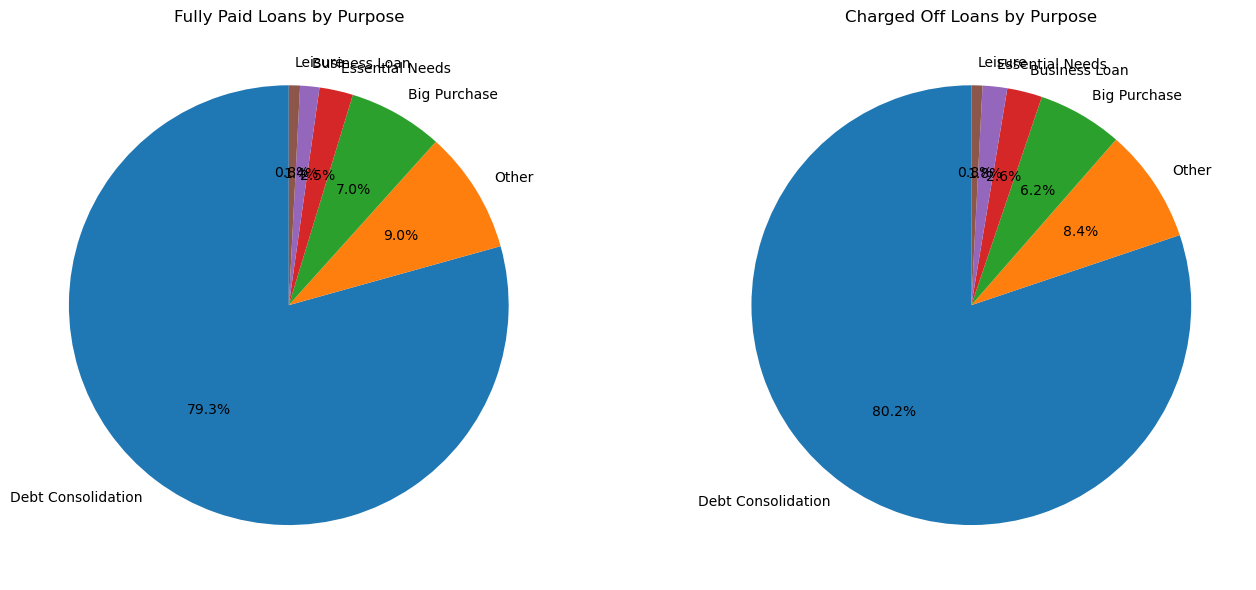

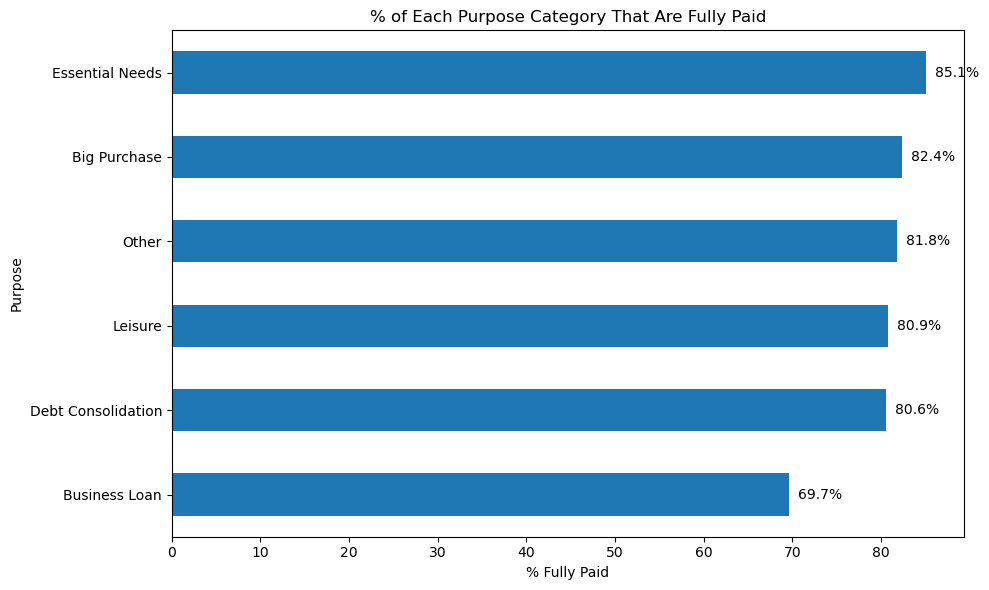

In [27]:
# Function to visualise relationship between categorical predictors and Loan Status  
def plot_loan_status_analysis(df, column):
    # Drop rows with missing values in the target column
    df_clean = df.dropna(subset=[column, 'Loan Status'])

    # Pie Charts
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    for i, status in enumerate(['Fully Paid', 'Charged Off']):
        counts = df_clean[df_clean['Loan Status'] == status][column].value_counts(normalize=True) * 100
        axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
        axes[i].set_title(f'{status} Loans by {column}')

    plt.tight_layout()
    plt.show()

    # Bar Chart: % of each group that are Fully Paid
    group_counts = df_clean.groupby([column, 'Loan Status']).size().unstack(fill_value=0)
    fully_paid_percent = (group_counts['Fully Paid'] / group_counts.sum(axis=1)) * 100
    fully_paid_percent = fully_paid_percent.sort_values()

    ax = fully_paid_percent.plot(kind='barh', figsize=(10, 6)) # Plot
    plt.xlabel('% Fully Paid')
    plt.title(f'% of Each {column} Category That Are Fully Paid')

    for i, v in enumerate(fully_paid_percent): # Add percentage labels
        ax.text(v + 1, i, f'{v:.1f}%', va='center', fontsize=10)

    plt.tight_layout()
    plt.show()

# Plot graphs
plot_loan_status_analysis(data, 'Term')
plot_loan_status_analysis(data, 'Years in current job')
plot_loan_status_analysis(data, 'Home Ownership')
plot_loan_status_analysis(data, 'Purpose')


### Observations: 
- `Purpose`: A lower percentage of Business Loans are fully paid (around 70% fully paid) as compared to all other loan types (around 80% fully paid). 
- `Term Category`: A higher percentage of Short Term loans are fully paid (82%) as compared to Long Term loans (76%)

### 6. Machine Learning

Classification Report:
              precision    recall  f1-score   support

 Charged Off       1.00      0.28      0.44       660
  Fully Paid       0.83      1.00      0.91      2343

    accuracy                           0.84      3003
   macro avg       0.92      0.64      0.67      3003
weighted avg       0.87      0.84      0.80      3003

Accuracy: 0.8418248418248419


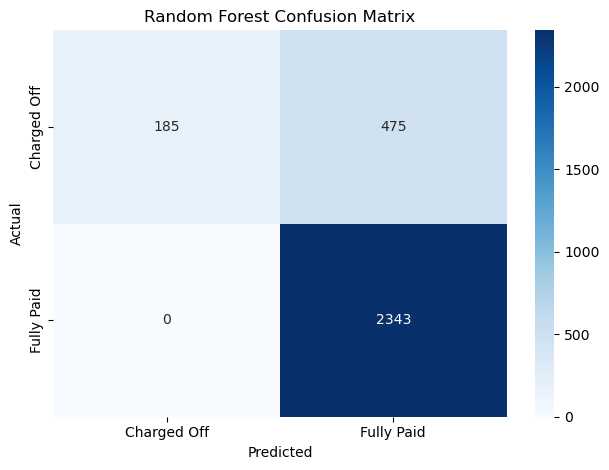

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define columns
numerical_columns = [
    'Current Loan Amount', 'Credit Score', 'Annual Income', 
    'Monthly Debt', 'Years of Credit History', 'Number of Open Accounts', 
    'Number of Credit Problems', 'Current Credit Balance', 
    'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'
]

categorical_columns = [
    'Term', 'Years in current job', 'Home Ownership', 'Purpose'
]

# Load your dataset here (replace this with your actual DataFrame)
# credit_data = pd.read_csv("your_dataset.csv")

# Drop rows with missing values
credit_data_clean = credit_data[numerical_columns + categorical_columns + ['Loan Status']].dropna()

# Features and target
X = credit_data_clean[numerical_columns + categorical_columns]
y = credit_data_clean['Loan Status']

# Encode target
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Preprocessing
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_columns),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_columns)
])

# Full pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=200,
        max_depth=15,
        min_samples_split=10,
        random_state=42
    ))
])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)

# Evaluate
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.tight_layout()
plt.show()


### Observations:
##### This model identified all the Fully Paid cases but missed most of the Charged Off cases - 476 cases were misclassified as Fully Paid.
##### It is skewed toward Fully Paid because that's the majority class. 0.28 recall score for Charged Off also indicates that this model is not useful in helping us identify risky loans.

### Something new we explored:
##### 1. RF with SMOTE (Synthetic Minority Over-Sampling Technique) - SMOTE Creates synthetic samples of the minority class to balance the dataset
##### 2. RF with Class Weight  
##### 3. RF using both techniques


In [50]:
# before this, run pip install imbalanced-learn in terminal
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE


In [51]:
smote_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(
        n_estimators=200, max_depth=15, min_samples_split=10, random_state=42
    ))
])

# Train
smote_pipeline.fit(X_train, y_train)
y_pred_smote = smote_pipeline.predict(X_test)


In [52]:
weight_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=200, max_depth=15, min_samples_split=10,
        class_weight='balanced', random_state=42
    ))
])

# Train
weight_pipeline.fit(X_train, y_train)
y_pred_weight = weight_pipeline.predict(X_test)


In [53]:
smote_weight_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(
        n_estimators=200, max_depth=15, min_samples_split=10,
        class_weight='balanced', random_state=42
    ))
])

# Train
smote_weight_pipeline.fit(X_train, y_train)
y_pred_smote_weight = smote_weight_pipeline.predict(X_test)

c:\Users\user\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8419 (\N{COMBINING ENCLOSING KEYCAP}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\user\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8419 (\N{COMBINING ENCLOSING KEYCAP}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\user\AppData\Local\Temp\ipykernel_2140\3864256852.py:24: UserWarning: Glyph 8419 (\N{COMBINING ENCLOSING KEYCAP}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8419 (\N{COMBINING ENCLOSING KEYCAP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


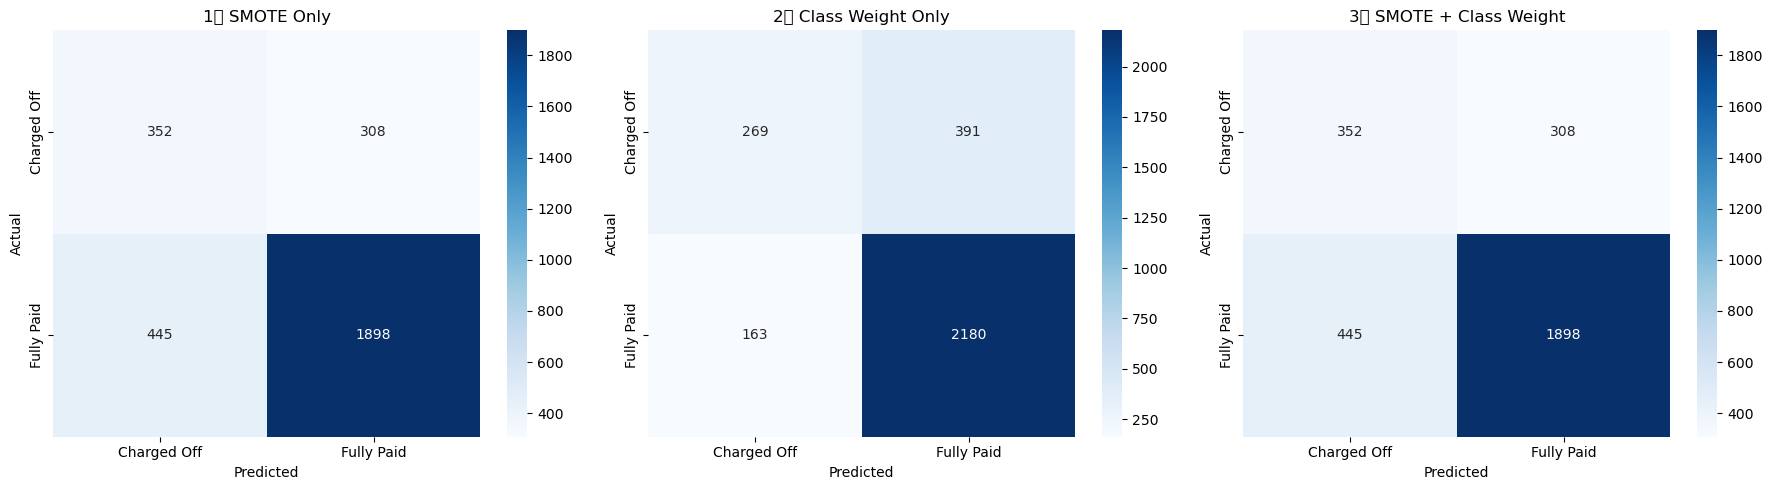

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# SMOTE
sns.heatmap(confusion_matrix(y_test, y_pred_smote), annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, ax=axes[0])
axes[0].set_title("1️ SMOTE Only")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# Class Weight
sns.heatmap(confusion_matrix(y_test, y_pred_weight), annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, ax=axes[1])
axes[1].set_title("2️Class Weight Only")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

# Both
sns.heatmap(confusion_matrix(y_test, y_pred_both), annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, ax=axes[2])
axes[2].set_title("3️ SMOTE + Class Weight")
axes[2].set_xlabel("Predicted")
axes[2].set_ylabel("Actual")

plt.tight_layout()
plt.show()


In [ ]:
print("SMOTE Only Report:")
print(classification_report(y_test, y_pred_smote, target_names=label_encoder.classes_))

print("Class Weight Only Report:")
print(classification_report(y_test, y_pred_weight, target_names=label_encoder.classes_))

print("SMOTE + Class Weight Report:")
print(classification_report(y_test, y_pred_both, target_names=label_encoder.classes_))


📋 SMOTE Only Report:
              precision    recall  f1-score   support

 Charged Off       0.44      0.53      0.48       660
  Fully Paid       0.86      0.81      0.83      2343

    accuracy                           0.75      3003
   macro avg       0.65      0.67      0.66      3003
weighted avg       0.77      0.75      0.76      3003


📋 Class Weight Only Report:
              precision    recall  f1-score   support

 Charged Off       0.62      0.41      0.49       660
  Fully Paid       0.85      0.93      0.89      2343

    accuracy                           0.82      3003
   macro avg       0.74      0.67      0.69      3003
weighted avg       0.80      0.82      0.80      3003


📋 SMOTE + Class Weight Report:
              precision    recall  f1-score   support

 Charged Off       0.44      0.53      0.48       660
  Fully Paid       0.86      0.81      0.83      2343

    accuracy                           0.75      3003
   macro avg       0.65      0.67      0.66   

### Observations:
##### Using SMOTE alone saw a improvement in recall for Charged Off to 0.53 which means it our model is now flagging out more risky cases. However, there is also an increase in false positives. Class Weight alone has the best accuracy at 0.82. Adding Class Weight to SMOTE had no value add

### Perform K-means for selected features only (reduce dimensionality)

-- avoid including 2 features that have very strong correlations (from heat map above)

-- include term and purpose for categorical since they differ more significantly between fully paid and charged off

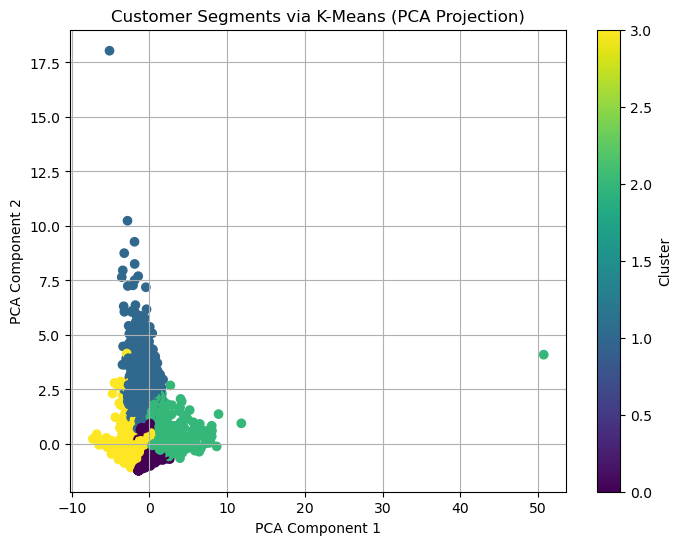

Cluster Summary:
         Number of Credit Problems  dti  loan_income_ratio  \
Cluster                                                      
0                             0.00 0.11               2.62   
1                             0.13 0.17             109.21   
2                             0.00 0.24               2.01   
3                             1.20 0.17               4.93   

         Current Credit Balance  
Cluster                          
0                     228365.50  
1                     224302.33  
2                     436049.23  
3                     173941.16  


In [56]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 1: Feature engineering
credit_data['dti'] = credit_data['Monthly Debt'] / (credit_data['Annual Income'] / 12)
credit_data['loan_income_ratio'] = credit_data['Current Loan Amount'] / credit_data['Annual Income']

# Step 2: Define features
numerical_features = ['Number of Credit Problems', 'dti', 'loan_income_ratio', 'Current Credit Balance']
categorical_features = ['Term', 'Purpose']

# Step 3: Preprocessing
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(drop='first'), categorical_features)
])

# Step 4: Build KMeans pipeline
kmeans_pipeline = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('cluster', KMeans(n_clusters=4, random_state=42))
])

# Step 5: Fit the model
kmeans_pipeline.fit(credit_data)
credit_data['Cluster'] = kmeans_pipeline.named_steps['cluster'].labels_

# Step 6: Visualize using PCA
X_preprocessed = preprocessor.fit_transform(credit_data)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_preprocessed)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=credit_data['Cluster'], cmap='viridis')
plt.title('Customer Segments via K-Means (PCA Projection)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

# Step 7: Cluster profile summary
summary = credit_data.groupby('Cluster')[
    ['Number of Credit Problems', 'dti', 'loan_income_ratio', 'Current Credit Balance']
].mean()

print("Cluster Summary:")
print(summary)


In [57]:
default_rate = credit_data.groupby('Cluster')['Loan Status'].value_counts(normalize=True).unstack()
print(default_rate)


Loan Status  Charged Off  Fully Paid
Cluster                             
0                   0.21        0.79
1                    NaN        1.00
2                   0.28        0.72
3                   0.22        0.78


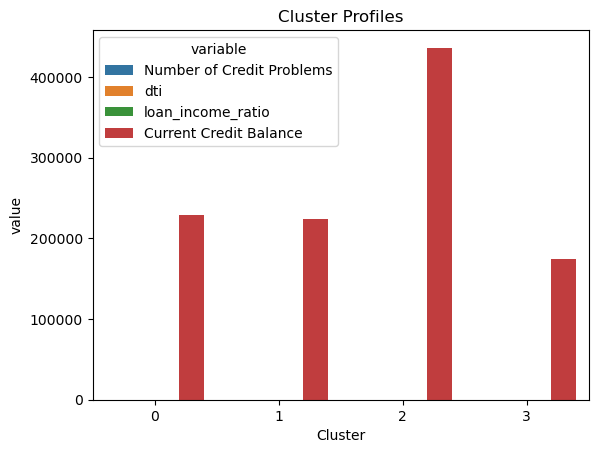

In [58]:
import seaborn as sns
cluster_profile = credit_data.groupby('Cluster')[numerical_features].mean().reset_index()
melted = cluster_profile.melt(id_vars='Cluster')
sns.barplot(x='Cluster', y='value', hue='variable', data=melted)
plt.title("Cluster Profiles")
plt.show()


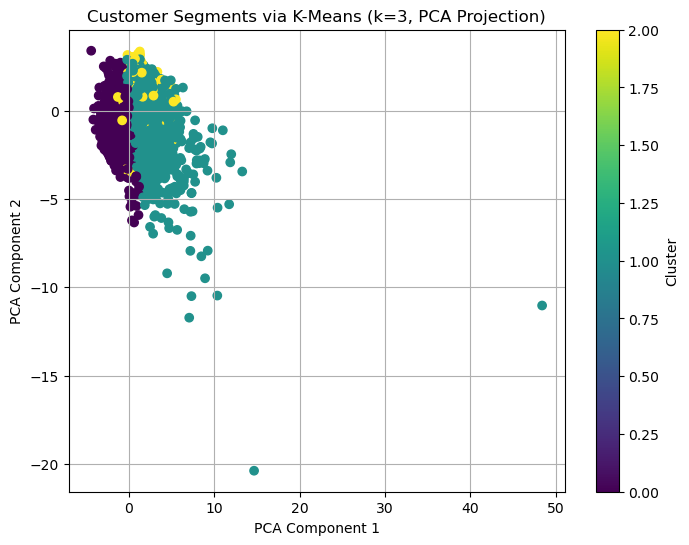

Cluster Summary:
         Credit Score  Annual Income  Monthly Debt  Number of Credit Problems  \
Cluster                                                                         
0              720.43     1164836.59      11594.15                       0.23   
1              714.55     1740107.01      28676.30                       0.08   
2             7101.05     1247331.79      18326.96                       0.15   

         Current Credit Balance  credit_utilization  loan_income_ratio  dti  \
Cluster                                                                       
0                     178101.64                0.42              18.65 0.13   
1                     467720.46                0.58               7.77 0.22   
2                     281422.49                0.52               0.29 0.19   

         dti  loan_income_ratio  credit_utilization  
Cluster                                              
0       0.13              18.65                0.42  
1       0.22       

In [61]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# -------------------------
# Step 1: Feature Engineering
# -------------------------
credit_data['dti'] = credit_data['Monthly Debt'] / (credit_data['Annual Income'] / 12)
credit_data['loan_income_ratio'] = credit_data['Current Loan Amount'] / credit_data['Annual Income']
credit_data['credit_utilization'] = credit_data['Current Credit Balance'] / credit_data['Maximum Open Credit']
credit_data['has_bankruptcies'] = (credit_data['Bankruptcies'] > 0).astype(int)
credit_data['has_tax_liens'] = (credit_data['Tax Liens'] > 0).astype(int)


credit_data = credit_data.replace([float('inf'), -float('inf')], pd.NA)
credit_data.dropna(subset=numerical_features + categorical_features, inplace=True)

# -------------------------
# Step 2: Define features
# -------------------------
numerical_features = [
    'Credit Score', 'Annual Income', 'Monthly Debt',
    'Number of Credit Problems', 'Current Credit Balance',
    'credit_utilization', 'loan_income_ratio', 'dti'
]

categorical_features = [
    'Term', 'Years in current job', 'Home Ownership', 'Purpose'
]

# -------------------------
# Step 3: Preprocessing
# -------------------------
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(drop='first'), categorical_features)
])

# -------------------------
# Step 4: Build pipeline with KMeans (k=3)
# -------------------------
kmeans_pipeline = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('cluster', KMeans(n_clusters=3, random_state=42))
])

# -------------------------
# Step 5: Fit model & assign cluster
# -------------------------
kmeans_pipeline.fit(credit_data)
credit_data['Cluster'] = kmeans_pipeline.named_steps['cluster'].labels_

# -------------------------
# Step 6: Visualize with PCA
# -------------------------
X_preprocessed = preprocessor.fit_transform(credit_data)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_preprocessed)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=credit_data['Cluster'], cmap='viridis')
plt.title('Customer Segments via K-Means (k=3, PCA Projection)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

# -------------------------
# Step 7: View cluster profile
# -------------------------
cluster_summary = credit_data.groupby('Cluster')[
    numerical_features + ['dti', 'loan_income_ratio', 'credit_utilization']
].mean()

print("Cluster Summary:")
print(cluster_summary)


In [62]:
print(credit_data.groupby('Cluster')['Loan Status'].value_counts(normalize=True).unstack())


Loan Status  Charged Off  Fully Paid
Cluster                             
0                   0.15        0.85
1                   0.19        0.81
2                   1.00         NaN


Silhouette Score: 0.158


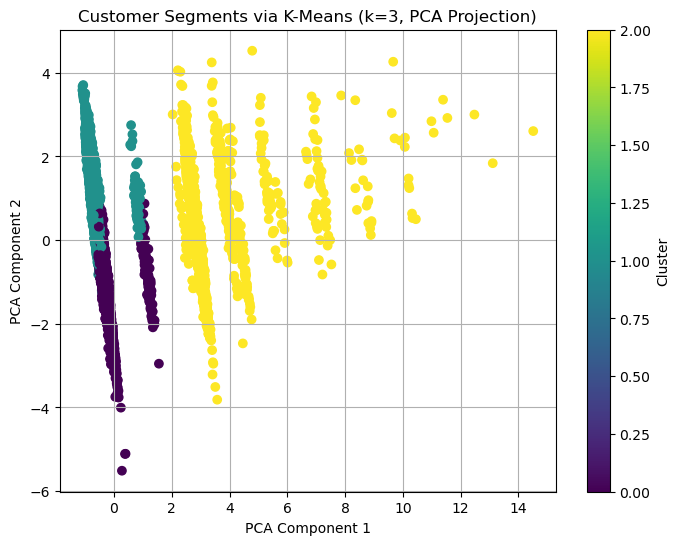


Cluster Summary:
         Credit Score  dti  loan_income_ratio  credit_utilization  \
Cluster                                                             
0              889.97 0.12              18.51                0.32   
1             1262.12 0.21               8.70                0.62   
2             1058.59 0.17              16.05                0.44   

         Number of Credit Problems  has_bankruptcies  has_tax_liens  
Cluster                                                              
0                             0.02              0.00           0.00  
1                             0.01              0.00           0.00  
2                             1.20              0.86           0.15  

Default Rate by Cluster:
Loan Status  Charged Off  Fully Paid
Cluster                             
0                   0.15        0.85
1                   0.27        0.73
2                   0.20        0.80


In [63]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# ------------------------------------------
# Step 1: Feature Engineering
# ------------------------------------------
credit_data['dti'] = credit_data['Monthly Debt'] / (credit_data['Annual Income'].replace(0, pd.NA) / 12)
credit_data['loan_income_ratio'] = credit_data['Current Loan Amount'] / credit_data['Annual Income'].replace(0, pd.NA)
credit_data['credit_utilization'] = credit_data['Current Credit Balance'] / credit_data['Maximum Open Credit'].replace(0, pd.NA)
credit_data['has_bankruptcies'] = (credit_data['Bankruptcies'] > 0).astype(int)
credit_data['has_tax_liens'] = (credit_data['Tax Liens'] > 0).astype(int)

# ------------------------------------------
# Step 2: Clean and drop rows with NaN/inf
# ------------------------------------------
credit_data = credit_data.replace([float('inf'), -float('inf')], pd.NA)
credit_data.dropna(subset=[
    'Credit Score', 'Monthly Debt', 'Annual Income', 'Current Loan Amount',
    'Current Credit Balance', 'Maximum Open Credit'
], inplace=True)

# ------------------------------------------
# Step 3: Define features
# ------------------------------------------
numerical_features = [
    'Credit Score', 'dti', 'loan_income_ratio', 'credit_utilization',
    'Number of Credit Problems', 'has_bankruptcies', 'has_tax_liens'
]
categorical_features = ['Term', 'Years in current job', 'Home Ownership', 'Purpose']

# ------------------------------------------
# Step 4: Preprocessing pipeline
# ------------------------------------------
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(drop='first'), categorical_features)
])

# ------------------------------------------
# Step 5: Build and fit KMeans pipeline
# ------------------------------------------
kmeans_pipeline = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('cluster', KMeans(n_clusters=3, random_state=42))
])

kmeans_pipeline.fit(credit_data)
credit_data['Cluster'] = kmeans_pipeline.named_steps['cluster'].labels_

# ------------------------------------------
# Step 6: Evaluate cluster quality
# ------------------------------------------
X_preprocessed = preprocessor.fit_transform(credit_data)
silhouette = silhouette_score(X_preprocessed, credit_data['Cluster'])
print(f"Silhouette Score: {silhouette:.3f}")

# ------------------------------------------
# Step 7: Visualize using PCA
# ------------------------------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_preprocessed)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=credit_data['Cluster'], cmap='viridis')
plt.title('Customer Segments via K-Means (k=3, PCA Projection)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

# ------------------------------------------
# Step 8: Cluster profile summary
# ------------------------------------------
summary = credit_data.groupby('Cluster')[numerical_features].mean()
print("\nCluster Summary:")
print(summary)

# Optional: Check default rate by cluster
if 'Loan Status' in credit_data.columns:
    print("\nDefault Rate by Cluster:")
    print(credit_data.groupby('Cluster')['Loan Status'].value_counts(normalize=True).unstack())